In [85]:
#导入必要的包
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

In [86]:
#加载数据集
data1 = loadmat('data1.mat')
data2 = loadmat('data2.mat')
data3 = loadmat('data3.mat')
dataMat1 = data1['X']
dataMat2 = data2['X']
dataMat3 = data3['X']

In [87]:
def pca(dataMat, topNfeat = 9999999):
    meanVals = mean(dataMat, axis = 0)  #计算数据平均值
    meanRemoved = dataMat - meanVals    #去中心化
    covMat = cov(meanRemoved, rowvar = 0 ) #计算协方差
    #补充下面代码，按照注释的思路完成PCA的计算
    eigenvalues,eigenvectors=np.linalg.eig(covMat)  #计算协方差矩阵的特征值和特征向量
    eigenvaluessort_index=np.argsort(eigenvalues)   #对特征值从小到大排序，并提取对应的index   
    topk_eigenvectors=eigenvectors[:,eigenvaluessort_index[:-topNfeat-1:-1]]#对特征排序结果逆序，并保留topNfeat的index,根据特征值排序结果得到topNfeat个最大的特征向量
    #print(topk_eigenvectors)
    lowDataMat=np.dot(meanRemoved,topk_eigenvectors)    #数据降维
    #print(lowDataMat)
#     print(meanRemoved)
#     print(topk_eigenvectors)
    lowDataMat=np.dot(lowDataMat,topk_eigenvectors.T) 
    reconMat=lowDataMat+meanVals                      #降维后的数据重构（对比上面的计算公式，注意前面有去中心化操作，需要恢复）
    return lowDataMat, reconMat
def drawDataSet(dataMat, reconMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:,0], dataMat[:,1], marker='^',s=90)
    plt.plot(reconMat[:,0],reconMat[:,1],c='r')
    plt.show()

降维后矩阵形状：
 (50, 2)


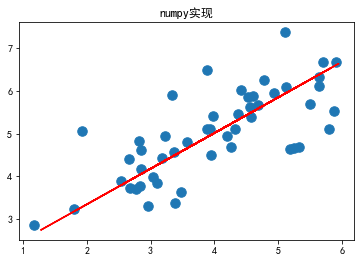

In [90]:
lowDataMat1, reconMat1 = pca(dataMat1,1)
print("降维后矩阵形状：\n",shape(lowDataMat1))
drawData(dataMat1, reconMat1)

降维后矩阵形状：
 (300, 2)


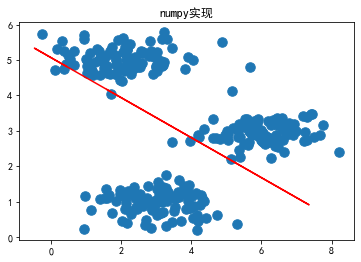

In [91]:
lowDataMat2, reconMat2 = pca(dataMat2,1)
print("降维后矩阵形状：\n",shape(lowDataMat2))
drawData(dataMat2, reconMat2)

降维后矩阵形状：
 (5000, 1024)


D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


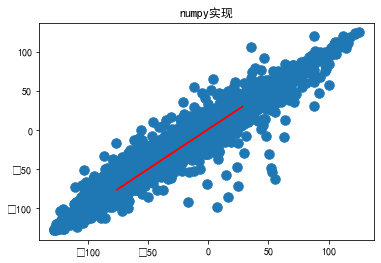

In [92]:
lowDataMat3, reconMat3 = pca(dataMat3,1)
print("降维后矩阵形状：\n",shape(lowDataMat3))
drawData(dataMat3, reconMat3)

In [74]:
#导入pca
from sklearn.decomposition import PCA

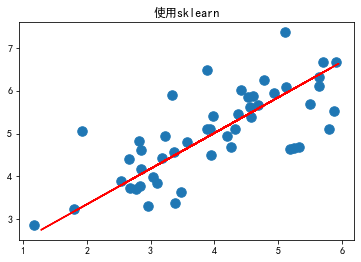

In [81]:
#定义pca模型
model = PCA(n_components=1)
newdata1 = model.fit_transform(dataMat1)
invX = model.inverse_transform(newdata1)
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title("使用sklearn")
plt.scatter(dataMat1[:,0], dataMat1[:,1], marker='o',s=90)
plt.plot(invX[:,0],invX[:,1],c='r')